In [ ]:
#import all necessaary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

: 

In [2]:

from google.colab import files

# Upload the file
uploaded = files.upload()

# Assuming the uploaded file is 'data.csv'
file_name = 'data (1).csv'


# Read the CSV file using pandas
df = pd.read_csv(file_name)
print(df.head())


Saving data (1).csv to data (1).csv
   footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
0         0         7   7    1   6    6  36   3            1     1
1       190         1   3    3   5    1  20   4            1     0
2        31         7   2    2   6    1  24   6            1     0
3        83         4   3    4   5    1  28   6            1     0
4       640         7   5    6   4    0  68   6            1     0


In [3]:
#Count missing values
print(df.isnull().sum())

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64


In [4]:
#DataFrame structure overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


In [5]:
#display column names
df.columns

Index(['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP',
       'Temperature', 'fail'],
      dtype='object')

In [6]:
#Summary statistics overview
df.describe(include="all")

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


In [7]:
X = df.drop('fail', axis=1)
y = df['fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [9]:
#classification report
y_pred=model.predict(X_test)
print(y_pred)
print(y_test)


[1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0
 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1
 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1
 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1
 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1
 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1
 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0]
96     1
265    0
811    1
23     1
30     0
      ..
688    0
212    1
79     0
148    0
678    0
Name: fail, Length: 284, dtype: int64


In [10]:

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy:.2f} ({accuracy * 100:.2f}%)")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")



Accuracy: 0.88 (88.38%)
Accuracy: 0.88
Precision: 0.86
Recall: 0.88
ROC AUC: 0.95


In [11]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")



Confusion Matrix:
[[142  18]
 [ 15 109]]


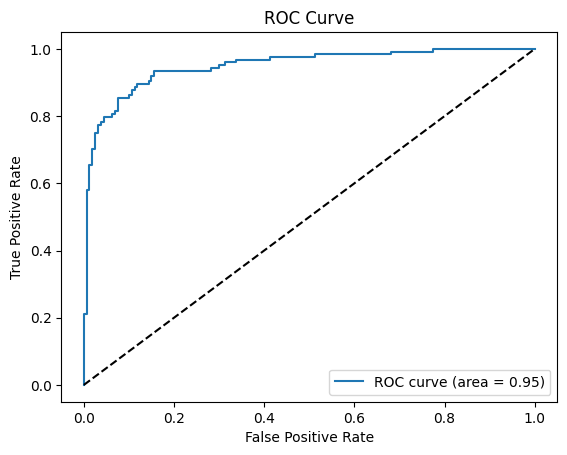

In [12]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()